In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
# %config InlineBackend.close_figures=False # keep figures open in pyplot

In [109]:
### load cifar csv
cifar_df = pd.read_csv("./denoising_cifar.csv")
print(cifar_df.head())
### data type
cifar_df.dtypes

   dpca_dim  Z1  Z2   psnr         method  seed
0         4   3   1  18.74   NDPCA (ours)     0
1         4   3   1  18.33   NDPCA (ours)     1
2         8   6   2  19.97   NDPCA (ours)     0
3         8   6   2  19.53   NDPCA (ours)     1
4         4   0   0  15.51            DAE     0


dpca_dim      int64
Z1            int64
Z2            int64
psnr        float64
method       object
seed          int64
dtype: object

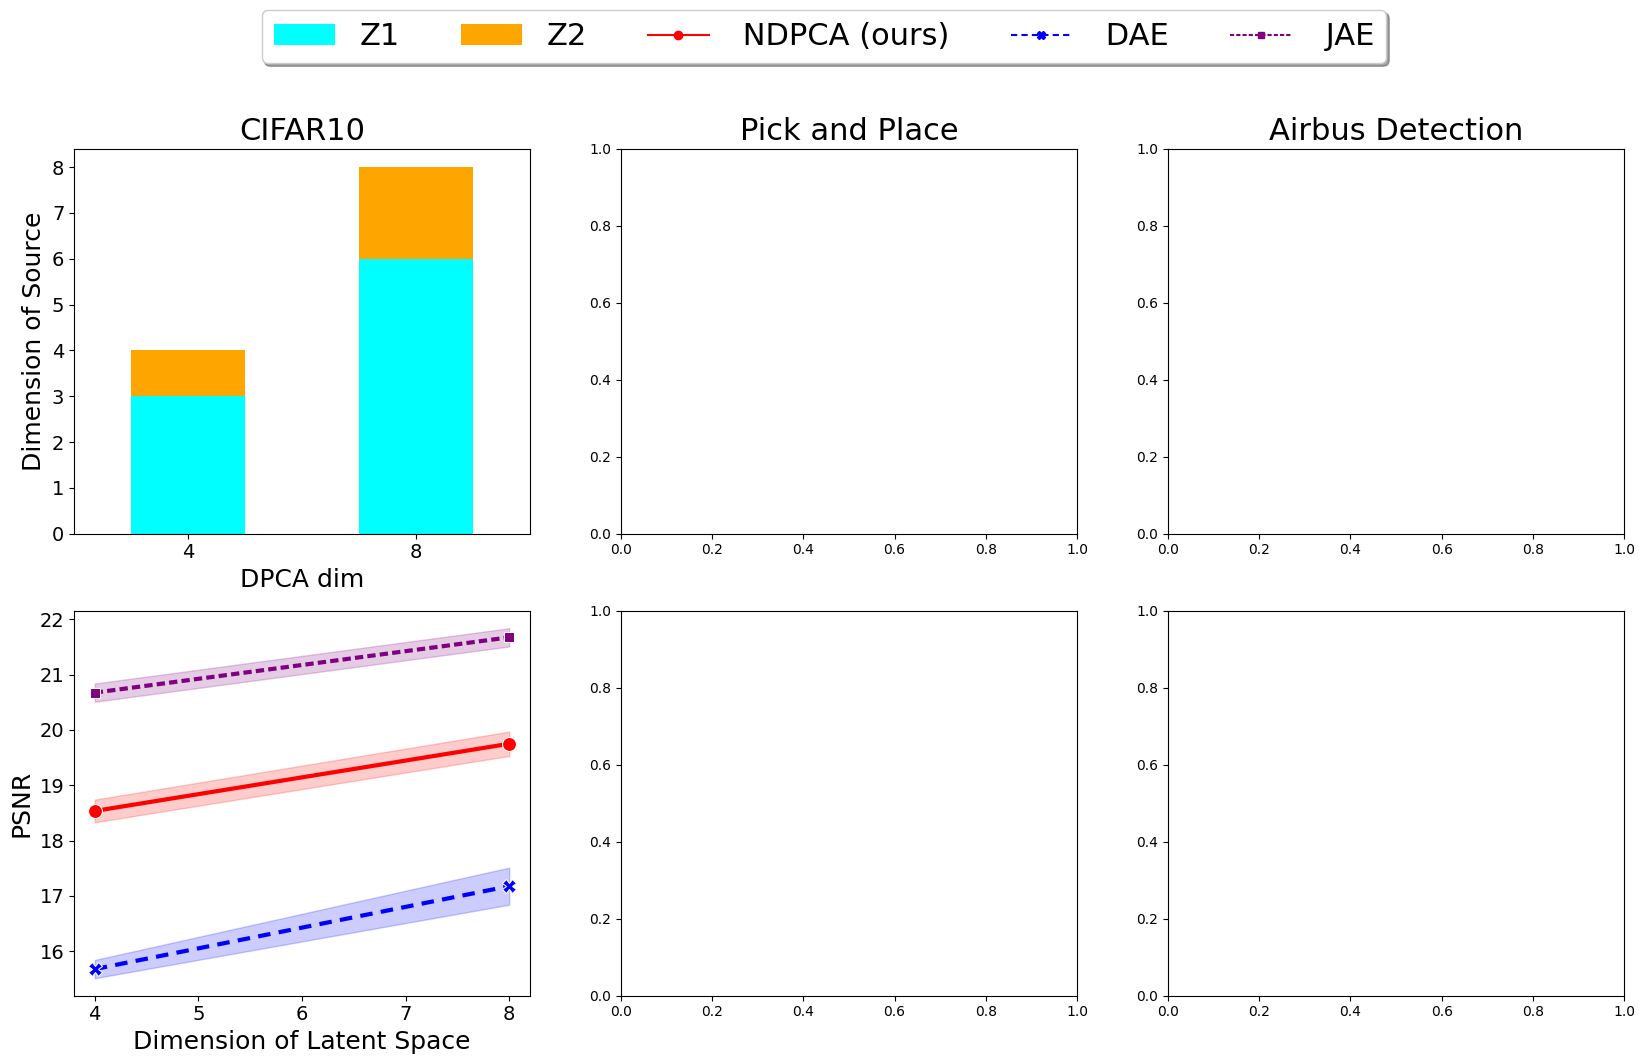

In [110]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_z", "pnp_z", "airbus_z"], 
        ["cifar_dpca", "pnp_dpca", "airbus_dpca"]],
        figsize=(20, 11))
        # gridspec_kw={
            # set the height ratios between the rows
            # "height_ratios": [1.5, 1.5, 1.5, 2, 2, 2],
            # set the width ratios between the columns
            # "width_ratios": [1, 1, 1, 1],})

####### ax #######
# 1 2 3
# 4 5 6
####### ax #######

### set title
ax_list["cifar_z"].set_title("CIFAR10", fontsize=22)
ax_list["pnp_z"].set_title("Pick and Place", fontsize=22)
ax_list["airbus_z"].set_title("Airbus Detection", fontsize=22)


### plot cifar denoising

## plot DPCA curve
ax4 = sns.lineplot(data=cifar_df, x="dpca_dim", y="psnr", ax=ax_list["cifar_dpca"], linewidth=3, hue='method',
                    palette=['red', 'blue', 'purple'], dashes=['', (3,2), (2,1)], style="method", markers=True, markersize=10)
ax_list["cifar_dpca"].set_xlabel("Dimension of Latent Space", fontsize=18)
ax_list["cifar_dpca"].set_ylabel("PSNR", fontsize=18)
ax_list["cifar_dpca"].tick_params(axis="x", labelsize=14)
ax_list["cifar_dpca"].tick_params(axis="y", labelsize=14)
ax_list["cifar_dpca"].legend().remove()

## plot Z1 and Z2
# select rows with dpca_dim == 8 and method == "NDPCA"
cifar_df_z = cifar_df.loc[(cifar_df["method"]).str.contains('NDPCA') & (cifar_df["seed"] == 0) ]
cifar_df_z.plot(kind='bar', stacked=True, color=['aqua', 'orange'], ax=ax_list["cifar_z"], 
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["cifar_z"].set_xlabel("DPCA dim", fontsize=18)
ax_list["cifar_z"].set_ylabel("Dimension of Source", fontsize=18)
ax_list["cifar_z"].tick_params(axis="x", labelsize=14)
ax_list["cifar_z"].tick_params(axis="y", labelsize=14)
ax_list["cifar_z"].legend().remove()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes ]#[ax_list["cifar_dpca"], ax_list["cifar_z"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), fancybox=True, shadow=True, ncol=6, fontsize=22)
plt.show()